# chapter 3. Evaluation¶

## Precision and Recall

**정밀도와 재현율**은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표이다. <br>
예측한 TP 값이 하나도 없기 때문에 정밀도와 재현율 값이 모두 0이다. <br>

**정밀도 = TP / (FP + TP)** <br>
**재현율 = TP / (FN + TP)** <br>

**정밀도**는 **예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율**을 뜻한다. <br>
공식의 분모인 FP + TP는 예측을 Positive로 한 모든 데이터 건수이며, 공식 분자인 TP는 예측과 실제 값이 Positive로 일치한 데이터 건수이다. <br>

**재현율**은 **실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율**을 뜻한다. <br>
공식 분모인 FN + TP는 실제 값이 Positive인 모든 데이터 건수이며, 공식 분자인 TP는 예측과 실제 값이 Positive로 일치한 데이터 건수이다. <br>

**재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우이다.** <br>

**재현율이 상대적으로 더 중요한 지표인 경우**는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우이다. <br>
**정밀도가 상대적으로 더 중요한 지표는 경우**는 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 ㅎ판단하게 되면 업무상 큰 영향이 발생하는 경우이다. <br>

사이킷런은 **정밀도 계산을 위해 precision_score()를, 재현율을 계산을 위해 recall_score() API로 제공**한다. 

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(Y_test, pred):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))

LogisticRegression 객체의 생성 인자로 입력되는 solver = 'liblinear'는 로지스틱 회귀의 최적화 알고리즘 유형을 지정하는 것이다. 

In [21]:
# 이전 Titanic Survivor Prediction with Scikit-Learn Data

from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

# Null 처리 함수 
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터 / 테스트 데이터 분할
titanic_df = pd.read_csv(r'/Users/1001l1000/Documents/AI-Tech/Jen/data/titanic_train.csv')
Y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, Y_train, Y_test = train_test_split(X_titanic_df, Y_titanic_df,
                                                    test_size = 0.20, random_state = 11)

lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, Y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(Y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705


### 정밀도 / 재현율 트레이드오프 

분류하려는 업무의 특성상 **정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임계값(Thershold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다.** <br>
정밀도와 재현율은 **상호 보완적인 평가 지표**이기 때문에 **어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다.** <br>
이를 **정밀도 / 재현율의 트레이드오프(Trade-Off)** 라고 한다. <br>

사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블에 속하는지 계산하기 위해 먼저 **개별 레이블 별로 결정 확률을 구한다.** <br>
그리고 **예측 확률이 큰 레이블 값으로 예측하게 된다.** <br>

사이킷런은 **개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()를 제공**한다. <br>
학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환한다. <br>

|입력 파라미터|반환 값|
|:------:|:---:|
|predict() 메서드와 동일하게 보통 테스트 피처의 데이터 세트를 입력|개별 클래스의 예측 확률을 ndarray m X n(m : 입력값의 레코드 수, n : 클래스 값 유형)형태로 반환한다. <br> 입력 테스트 데이터 세트의 표본 갯수가 100개이고, 예측 클래스 값 유형이 2개라면(이진 분류) 반환 값은 100 X 2 ndarray이다. <br> 각 열은 개별 클래스의 예측확률이다. 이진 분류에서 첫 번째 column은 0 Negative의 확률, 두 번째 column은 1 Positive의 확률이다.|

In [34]:
import numpy as np

pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 shape : {0}'.format(pred_proba.shape))
print('pred_proba() array에서 앞 3개만 샘플로 추출 : \n', pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 병합(concatenate)해 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 : \n', pred_proba_result[:3])

pred_proba() 결과 shape : (179, 2)
pred_proba() array에서 앞 3개만 샘플로 추출 : 
 [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 : 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


**predict() 메서드는 predict_proba() 메서드에 기반해 생성된 API**이다. <br>
사이킷런의 predic()는 predict_proba() 메서드가 반환하는 확률 값을 가진 ndarray에서 **정해진 임계값을 만족하는 ndarray의 column의 위치를 최종 예측 클래스로 결정**한다. 

In [35]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2], 
    [2, 0, 0],
    [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold 값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [36]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임계값
custom_threshold = 0.5

# predict_proba() 반환값의 두 번쨰 column, 즉 Positive 클래스 column 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(Y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705


In [37]:
# Binarizer의 threshold 설정값을 0.4로 설정, 즉 분류 결정 임계값을 0.5에서 0.4로 낮춘다.
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(Y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.7042, 재현율 : 0.8197


**임계값을 낮추니 재현율 값이 올라가고 정밀도는 떨어졌다.** <br>
분류 결정 임계값은 Positive 예측값을 결정하는 확률의 기준이 된다. <br>
임계값을 낮출수록 True 값이 많아지게 된다. <br>

<img src = 'image/Increase Recall.jpg' alt = 'Increase Recall' width='700' height='700'>

Positive 예측값이 많아지면 상대적으로 재현율 값이 높아진다. <br>
양성 예측을 많이 하다 보니 실제 양성을 음성으로 예측하는 경우가 상대적으로 줄어들기 때문이다. 

In [38]:
# 테스트를 수행할 모든 임계값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.60]

def get_eval_by_threshold(Y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값 : ', custom_threshold)
        get_clf_eval(Y_test, custom_predict)
        
get_eval_by_threshold(Y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값 :  0.4
오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.7042, 재현율 : 0.8197
임계값 :  0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도 : 0.8547, 정밀도 : 0.7869, 재현율 : 0.7869
임계값 :  0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705
임계값 :  0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8771, 정밀도 : 0.8980, 재현율 : 0.7213


**사이킷런은 이와 유사한 precision_recall_curve() API를 제공**한다. <br>

|입력 파라미터|반환 값|
|:------:|:---:|
|y_true : 실제 클래스 값 배열 (배열 크기 = [데이터 건수]) <br> probas_pred : Positive column의 예측 확률 배열 (배열 크기 = [데이터 건수])| 정밀도 : 임계값별 정밀도 값을 배열로 반환 <br> 재현율 : 임계값별 재현율을 배열로 반환|

In [39]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때 예측 확률을 추측
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, -1]

# 실제값 데이터 세트와 레이블 값이 1일 때 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(Y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 shape : ', thresholds.shape)

# 반환된 임계값 배열 row가 147건이므로 샘플로 10건만 추출하되, 임계값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 1개 : ', thr_index)
print('샘플용 10개의 임계값 : ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도 : ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율 : ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임계값 배열의 shape :  (165,)
샘플 추출을 위한 임계값 배열의 index 1개 :  [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임계값 :  [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값별 정밀도 :  [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율 :  [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


추출된 임계값 샘플 10개에 해당하는 정밀도 값과 재현율 값을 살펴보면 임계값이 증가할수록 정밀도값은 동시에 높아지나 재현율 값은 낮아짐을 알 수 있다. <br>
precision_recall_curve() API는 정밀도와 재현율의 임계값에 따른 값 변화를 곡선 형태의 그래프로 시각화하는데 이용할 수 있다. 

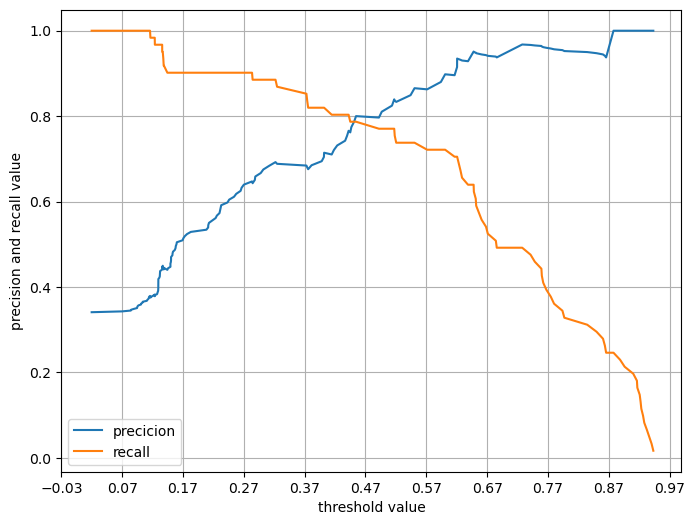

In [43]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(Y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(Y_test, pred_proba_c1)
    
    # X출을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '-', label = 'precicion')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    # threshoold 값 X 축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x, y축 label과 legend, grid 설정
    plt.xlabel('threshold value'); plt.ylabel('precision and recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(Y_test, lr_clf.predict_proba(X_test)[:, 1])

### 정밀도와 재현율의 맹점

Positive 예측의 임계값을 변경함에 따라 정밀도와 재현율의 수치가 변경된다. <br>
임계값의 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용되어야 한다. <br>

**정밀도가 100%가 되는 방법** <br>
확실한 기준이 되는 경우만 Positive로 예측하고 나머지 모두 Negative로 예측한다. <br>
**정밀도 = TP / (TP + FP)** <br>

**재현율이 100%가 되는 방법** <br>
모든 환자를 Positive로 예측하면 된다. <br>
**재현율 = TP / (TP + FN)**